In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data= pd.read_csv('cleaned_data.csv')

data = data[~data['Target'].isin(['Enrolled'])]
data['Target_encoded'] = np.where(data['Target_encoded']>=1,0,1)
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [3]:
data[['Target','Target_encoded']]

,Target,Target_encoded
0,Dropout,1
1,Graduate,0
2,Dropout,1
3,Graduate,0
4,Graduate,0
...,...,...
4419,Graduate,0
4420,Dropout,1
4421,Dropout,1
4422,Graduate,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nationality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                        

In [5]:
#Checking the variance of the numeric variables
numerics = ['Age at enrollment','Previous qualification (grade)','Admission grade', 'Unemployment rate','Inflation rate','GDP','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (without evaluations)']

In [6]:
school_df = data.copy()

In [7]:
school_df[numerics].describe()

,Age at enrollment,Previous qualification (grade),Admission grade,Unemployment rate,Inflation rate,GDP,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations)
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,23.461157,132.920606,127.293939,11.630358,1.231598,-0.009256,10.534876,10.036171,0.754270,6.337466,8.071074,4.791460,0.128926,0.581818,6.296419,7.763085,4.518457,0.142149
std,7.827994,13.238373,14.611295,2.667652,1.384911,2.259986,5.057700,5.481759,2.477277,2.570773,4.286632,3.237845,0.679111,2.022688,2.263020,3.964163,3.162376,0.747670
min,17.000000,95.000000,95.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,125.000000,118.000000,9.400000,0.300000,-1.700000,11.000000,10.517500,0.000000,5.000000,6.000000,3.000000,0.000000,0.000000,5.000000,6.000000,2.000000,0.000000
50%,20.000000,133.100000,126.500000,11.100000,1.400000,0.320000,12.340000,12.330000,0.000000,6.000000,8.000000,5.000000,0.000000,0.000000,6.000000,8.000000,5.000000,0.000000
75%,25.000000,140.000000,135.100000,13.900000,2.600000,1.790000,13.500000,13.500000,0.000000,7.000000,10.000000,6.000000,0.000000,0.000000,7.000000,10.000000,6.000000,0.000000
max,70.000000,190.000000,190.000000,16.200000,3.700000,3.510000,18.880000,18.570000,20.000000,26.000000,45.000000,26.000000,12.000000,19.000000,23.000000,33.000000,20.000000,12.000000


#  Feature Creation

 Develop new features based on domain knowledge (e.g., study time per credit
)
• Create interaction terms between existing features
• Implement polynomial features for numerical variables
• Develop time-based features (e.g., time since last ex

In [8]:
school_df['Total Curricular units (grade)']	= school_df['Curricular units 1st sem (grade)'] + school_df['Curricular units 2nd sem (grade)']
school_df['Total Curricular units (credited)']	= school_df['Curricular units 1st sem (credited)'] + school_df['Curricular units 2nd sem (credited)']
school_df['Total Curricular units (enrolled)'] = school_df['Curricular units 1st sem (enrolled)']	+ school_df['Curricular units 2nd sem (enrolled)']
school_df['Total Curricular units (evaluations)'] = school_df['Curricular units 1st sem (evaluations)'] + school_df['Curricular units 2nd sem (evaluations)']
school_df['Total Curricular units (approved)'] = school_df['Curricular units 2nd sem (approved)']	+ school_df['Curricular units 2nd sem (approved)']
school_df['Total Curricular units (without evaluations)'] = school_df['Curricular units 2nd sem (without evaluations)'] +school_df ['Curricular units 2nd sem (without evaluations)']

for all in numerics[6:]:
  school_df.drop(all,axis=1,inplace=True)
code_num=['Age at enrollment','Previous qualification (grade)','Admission grade', 'Total Curricular units (grade)','Total Curricular units (credited)','Total Curricular units (enrolled)','Total Curricular units (evaluations)','Total Curricular units (approved)','Total Curricular units (without evaluations)']
num = ['Unemployment rate','Inflation rate','GDP','Age at enrollment','Previous qualification (grade)','Admission grade', 'Total Curricular units (grade)','Total Curricular units (credited)','Total Curricular units (enrolled)','Total Curricular units (evaluations)','Total Curricular units (approved)','Total Curricular units (without evaluations)']
school_df['Previous qualification (grade)'].value_counts()
school_df[num].isna().sum()



Unemployment rate                               0
Inflation rate                                  0
GDP                                             0
Age at enrollment                               0
Previous qualification (grade)                  0
Admission grade                                 0
Total Curricular units (grade)                  0
Total Curricular units (credited)               0
Total Curricular units (enrolled)               0
Total Curricular units (evaluations)            0
Total Curricular units (approved)               0
Total Curricular units (without evaluations)    0
dtype: int64

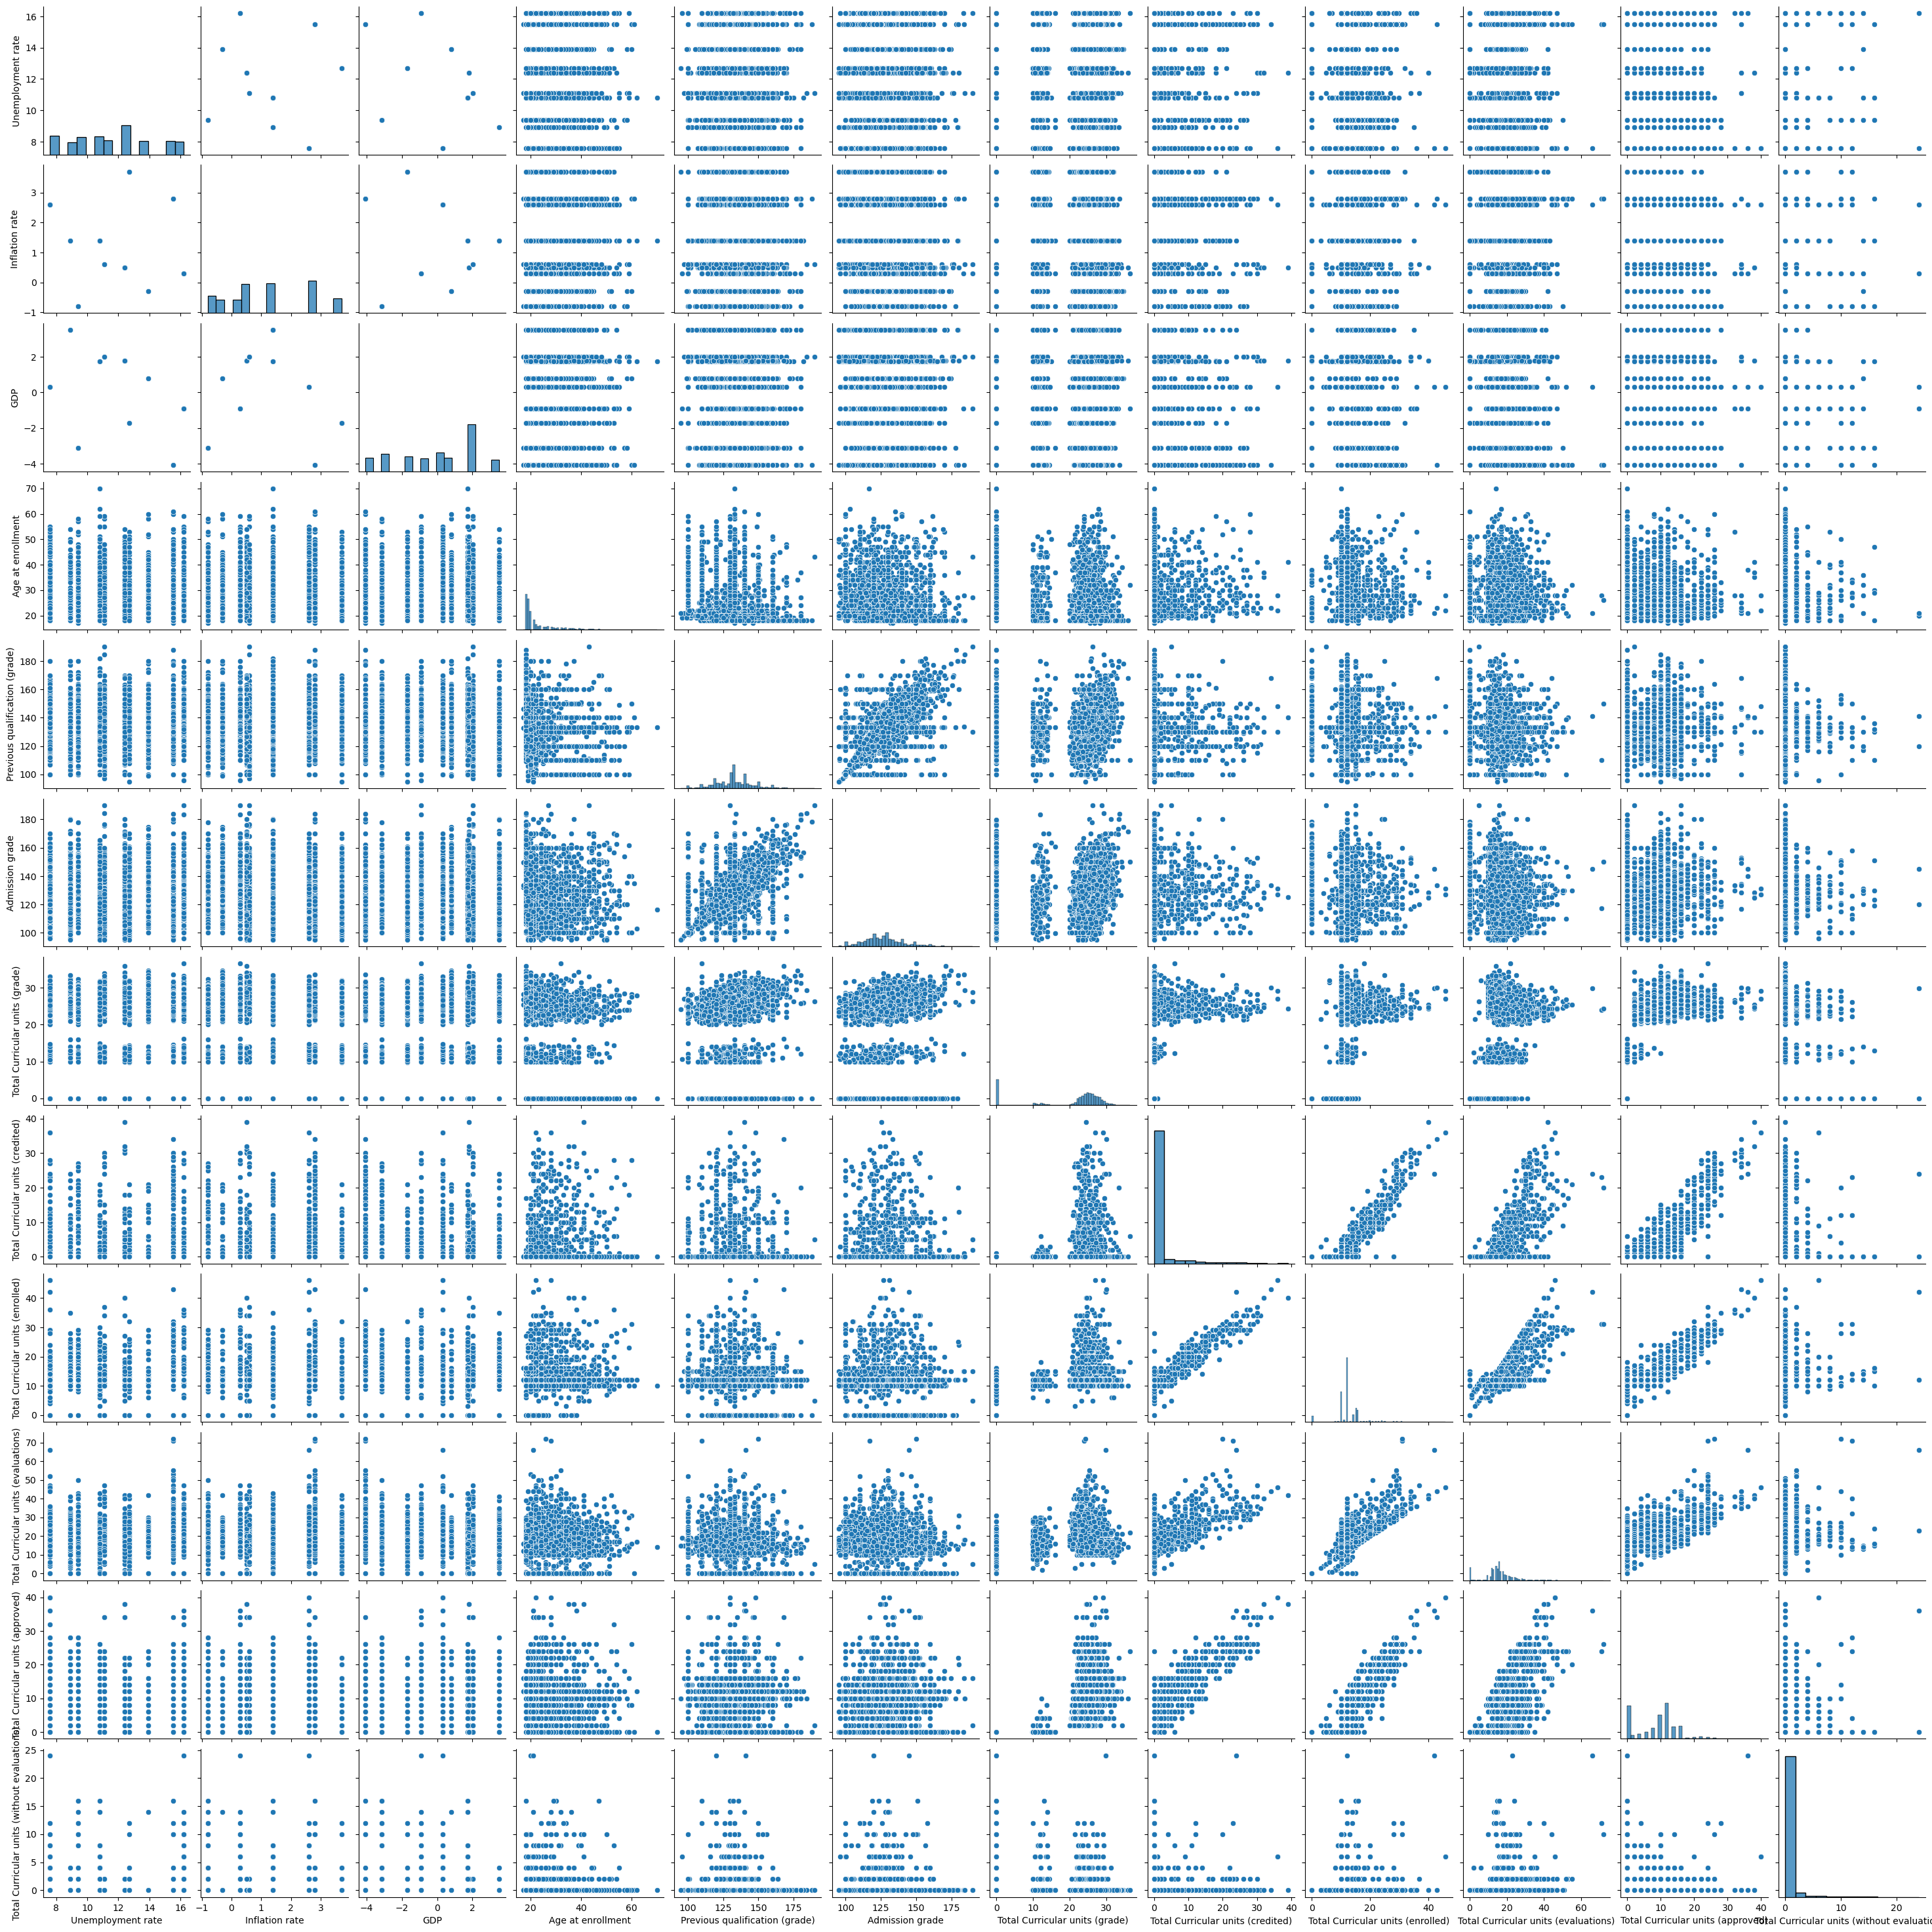

In [9]:
sns.pairplot(school_df[num])
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,interaction_only=True)
poly.fit_transform(school_df[num].values)

array([[ 1. , 10.8,  1.4, ...,  0. ,  0. ,  0. ],
       [ 1. , 13.9, -0.3, ...,  0. ,  0. ,  0. ],
       [ 1. , 10.8,  1.4, ...,  0. ,  0. ,  0. ],
       ...,
       [ 1. , 13.9, -0.3, ...,  0. ,  0. ,  0. ],
       [ 1. ,  9.4, -0.8, ...,  0. ,  0. ,  0. ],
       [ 1. , 12.7,  3.7, ...,  0. ,  0. ,  0. ]])

### Feature Transformation
• Apply log transformation to skewed numerical features
• Bin continuous variables into categorical ones where appropriate
• Standardize numerical features

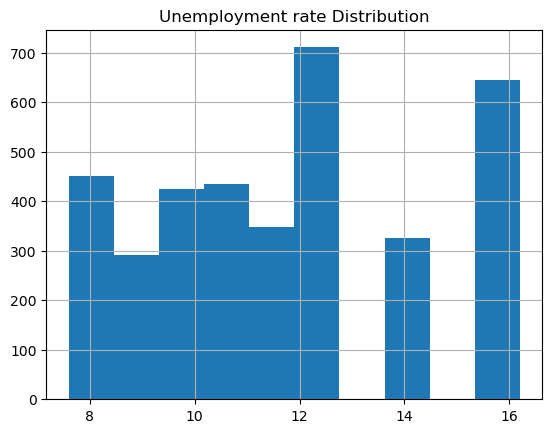

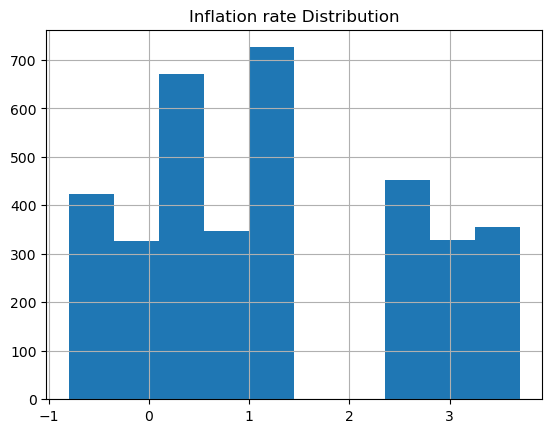

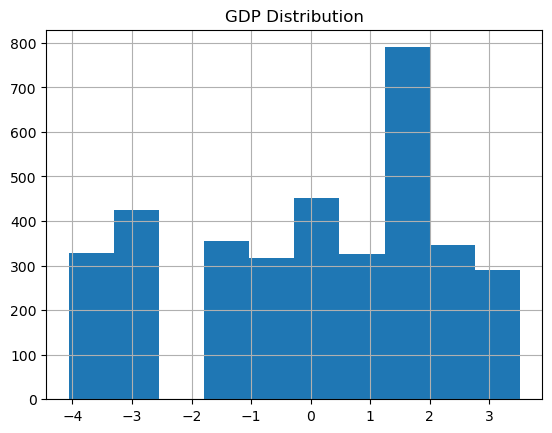

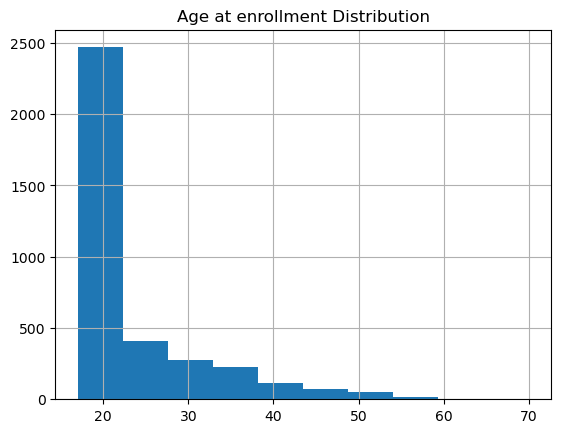

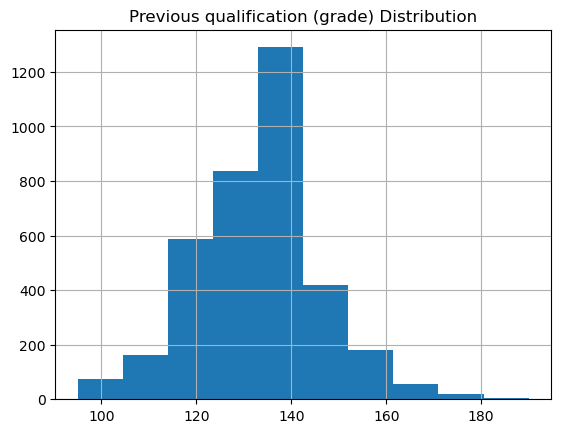

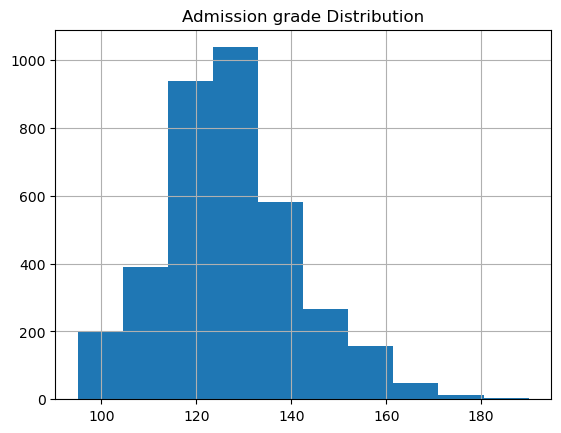

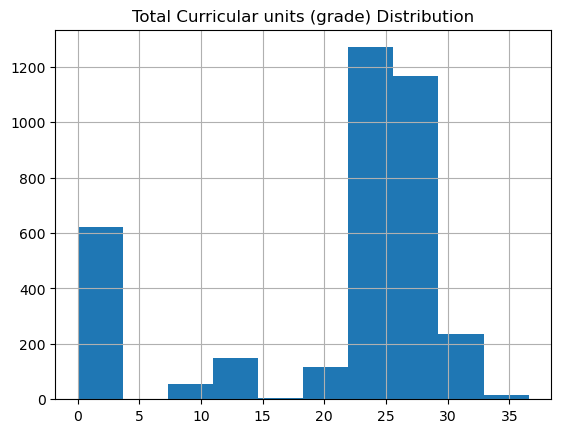

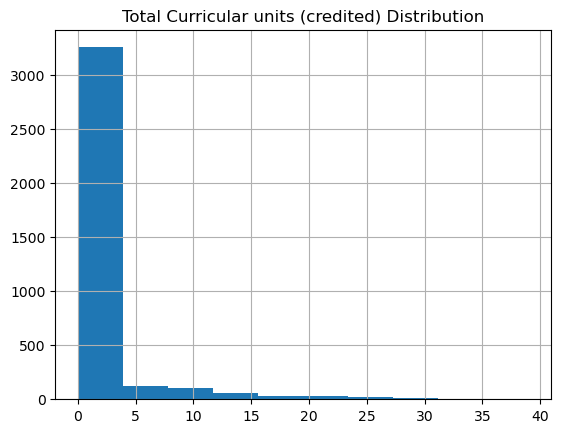

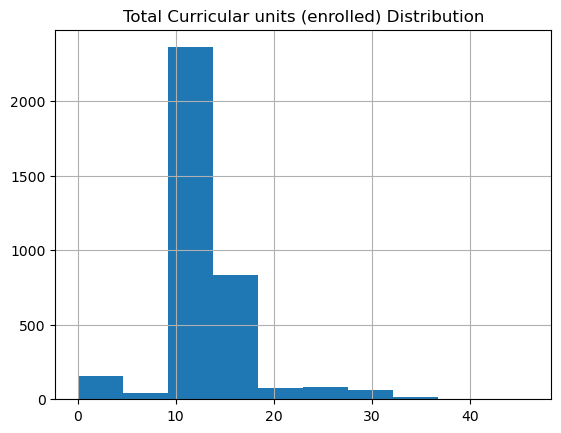

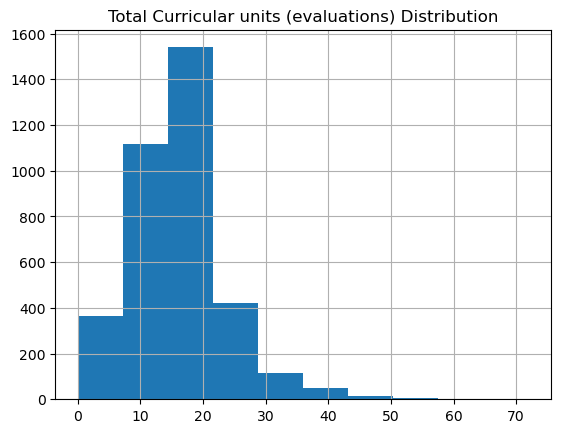

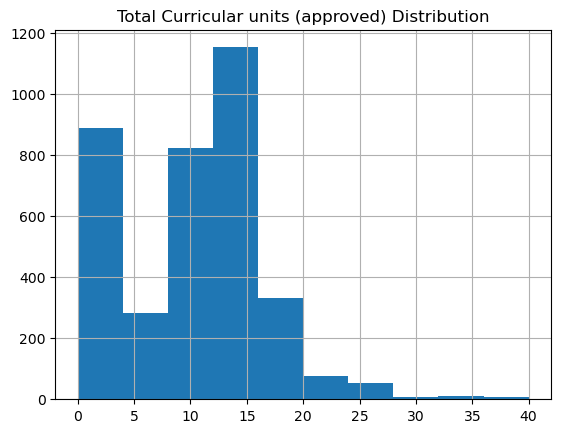

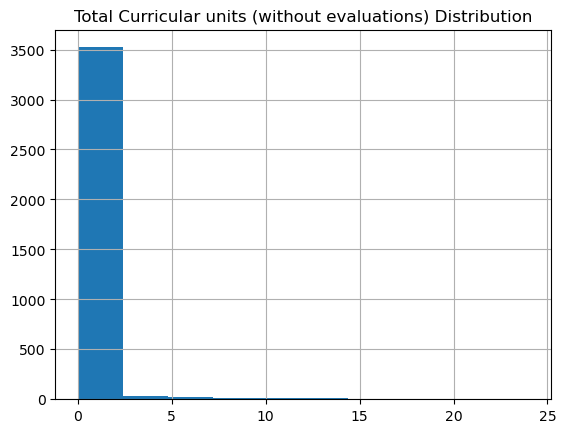

In [11]:
# Checking the distribution of the numeric variables
for numeric in num:
    school_df[f'{numeric}'].hist()
    plt.title(f'{numeric} Distribution')
    plt.show()

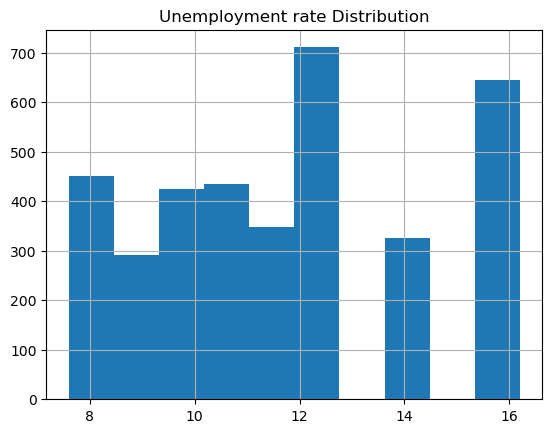

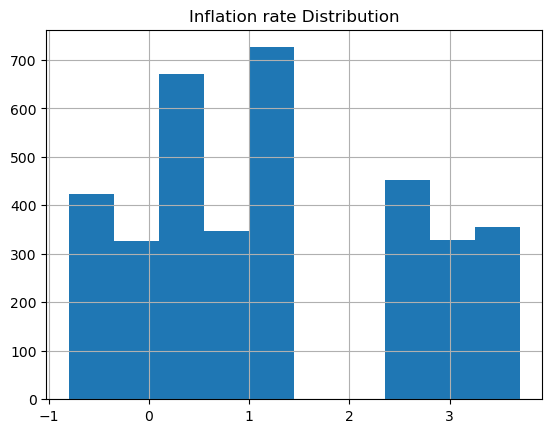

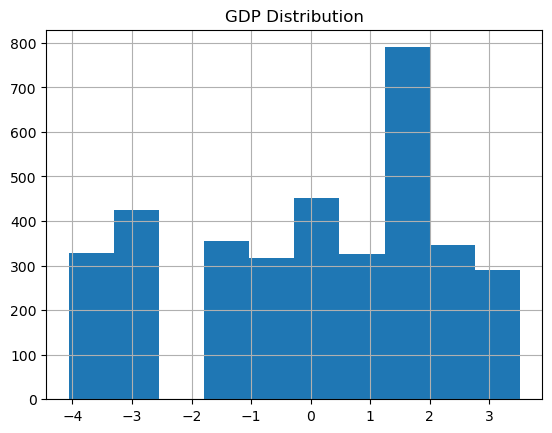

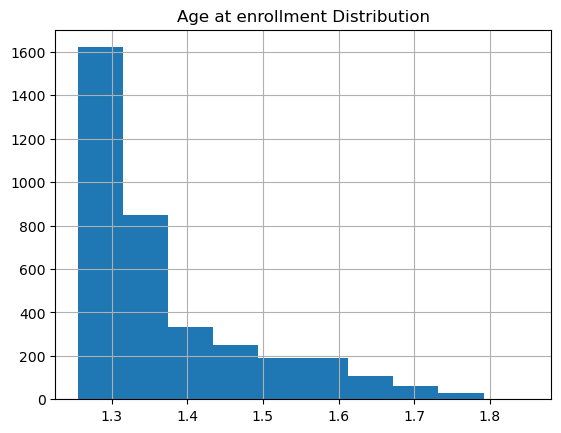

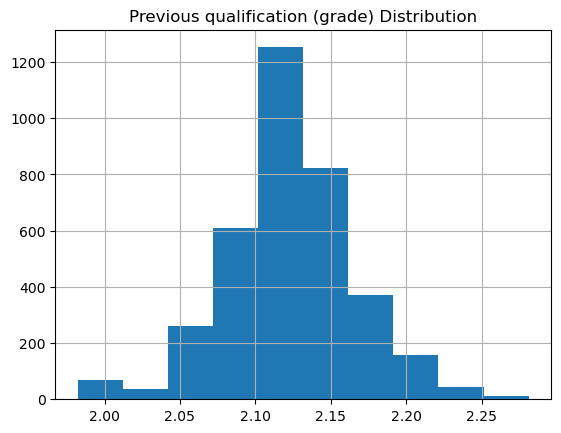

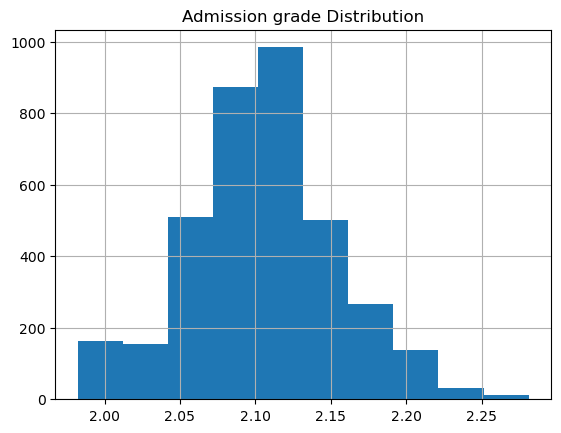

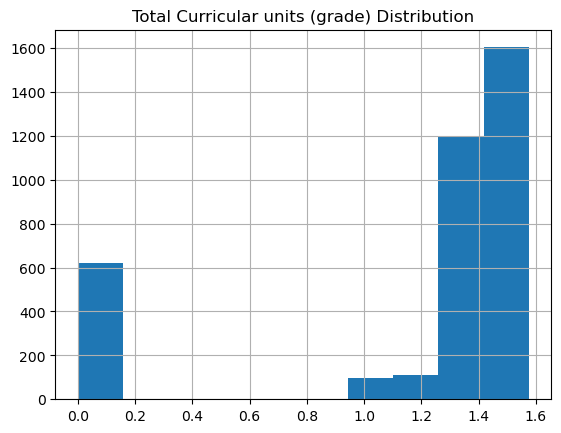

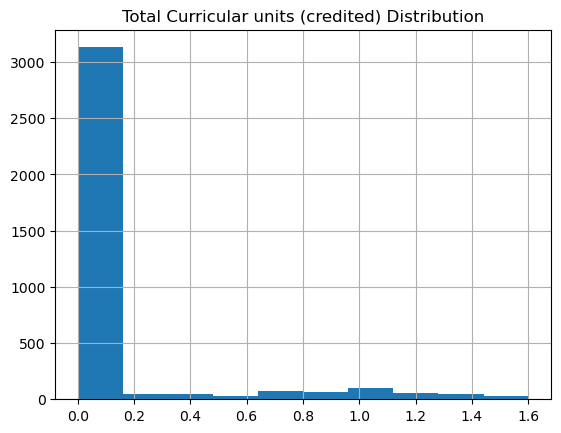

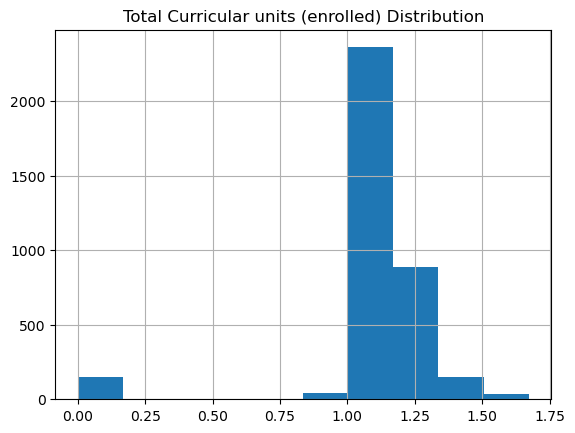

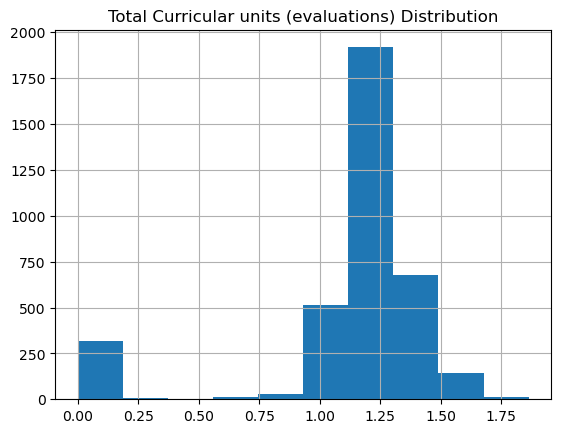

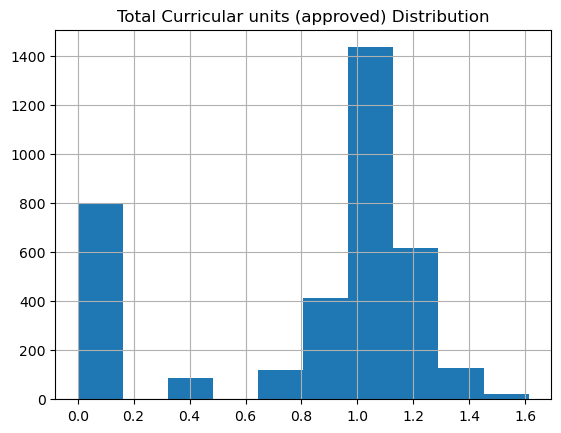

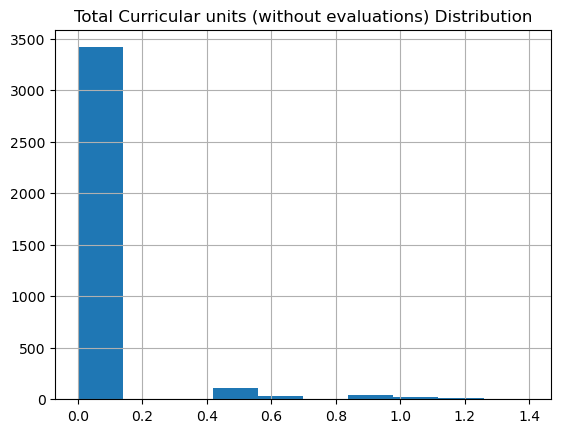

In [13]:

for n in code_num:
  school_df[n]=np.log10(school_df[n]+1)

for numeric in num:
    school_df[numeric].hist()
    plt.title(f'{numeric} Distribution')
    plt.show()

In [14]:
school_df['Admission grade'] = pd.cut(school_df['Admission grade'],bins=[0,130,150,170,190], labels=[10,20,30,40])
school_df['Previous qualification (grade)'] = pd.cut(school_df['Previous qualification (grade)'], bins=[0,130,150,170,190], labels=[10,20,30,40])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
school_df[num] = scaler.fit_transform(school_df[num])

## Feature selection
1. Chisquare for filtering

In [16]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
school_df.drop('Target', axis=1, inplace=True)
X_columns = school_df.drop('Target_encoded', axis=1).columns
X= school_df.drop('Target_encoded',axis=1)
y= school_df['Target_encoded']

In [17]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=10)


cat= X.drop(num,axis=1)


# # Summarize scores
# np.set_printoptions(precision=3)
# # print(fit.scores_)

# features = test.fit_transform(cat,y)
# # Summarize selected features
# print(features[0:5,:])
cat

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
0,0,7,5,1,1,0,0,12,9,5,9,1,0,0,1,1,0,0
1,0,5,1,10,1,0,0,0,2,3,3,1,0,0,0,1,0,0
2,0,0,5,4,1,0,0,21,26,9,9,1,0,0,0,1,0,0
3,0,7,2,14,1,0,0,22,26,5,3,1,0,0,1,0,0,0
4,1,11,1,2,0,0,0,21,27,9,9,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,0,6,14,1,0,0,0,0,5,4,0,0,0,1,1,0,0
4420,0,0,2,14,1,0,18,0,0,9,9,1,0,1,0,0,0,1
4421,0,0,1,11,1,0,0,21,26,9,9,1,0,0,1,0,1,0
4422,0,0,1,8,1,0,0,21,26,7,4,1,0,0,1,0,1,0


2. Recursive Feature Elimination

In [18]:
# Feature extraction
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X, y)
# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))
important_features = pd.DataFrame(list(zip(X_columns,fit.support_)),columns=['Feature','Important'])
important_features.sort_values(by='Important', ascending=False)

,Feature,Important
23,GDP,True
24,Total Curricular units (grade),True
19,Age at enrollment,True
11,Father's occupation,True
9,Father's qualification,True
16,Tuition fees up to date,True
26,Total Curricular units (enrolled),True
27,Total Curricular units (evaluations),True
3,Course,True
28,Total Curricular units (approved),True


In [19]:
X.isna().sum()

Marital status                                  0
Application mode                                0
Application order                               0
Course                                          0
Daytime/evening attendance                      0
Previous qualification                          0
Previous qualification (grade)                  0
Nationality                                     0
Mother's qualification                          0
Father's qualification                          0
Mother's occupation                             0
Father's occupation                             0
Admission grade                                 0
Displaced                                       0
Educational special needs                       0
Debtor                                          0
Tuition fees up to date                         0
Gender                                          0
Scholarship holder                              0
Age at enrollment                               0


In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, random_state=None, solver='auto', tol=0.001)
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
print("Ridge model:", pretty_print_coefs(ridge.coef_))
print(school_df.columns)


Ridge model: -0.009 * X0 + 0.005 * X1 + 0.0 * X2 + 0.009 * X3 + 0.036 * X4 + -0.003 * X5 + 0.0 * X6 + 0.012 * X7 + 0.002 * X8 + -0.001 * X9 + -0.004 * X10 + -0.001 * X11 + 0.0 * X12 + 0.018 * X13 + 0.055 * X14 + 0.12 * X15 + -0.21 * X16 + 0.05 * X17 + -0.101 * X18 + 0.018 * X19 + -0.205 * X20 + 0.001 * X21 + -0.003 * X22 + -0.004 * X23 + 0.103 * X24 + 0.053 * X25 + 0.063 * X26 + 0.02 * X27 + -0.43 * X28 + 0.003 * X29
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target_encoded',
       'Tota

Dimensional Reduction
1. PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit_transform(X)
pca.n_components_

7

In [22]:
pca.explained_variance_ratio_

array([0.51214494, 0.14413924, 0.10686434, 0.08121862, 0.05959816,
       0.03389473, 0.01430332])

T-SNE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


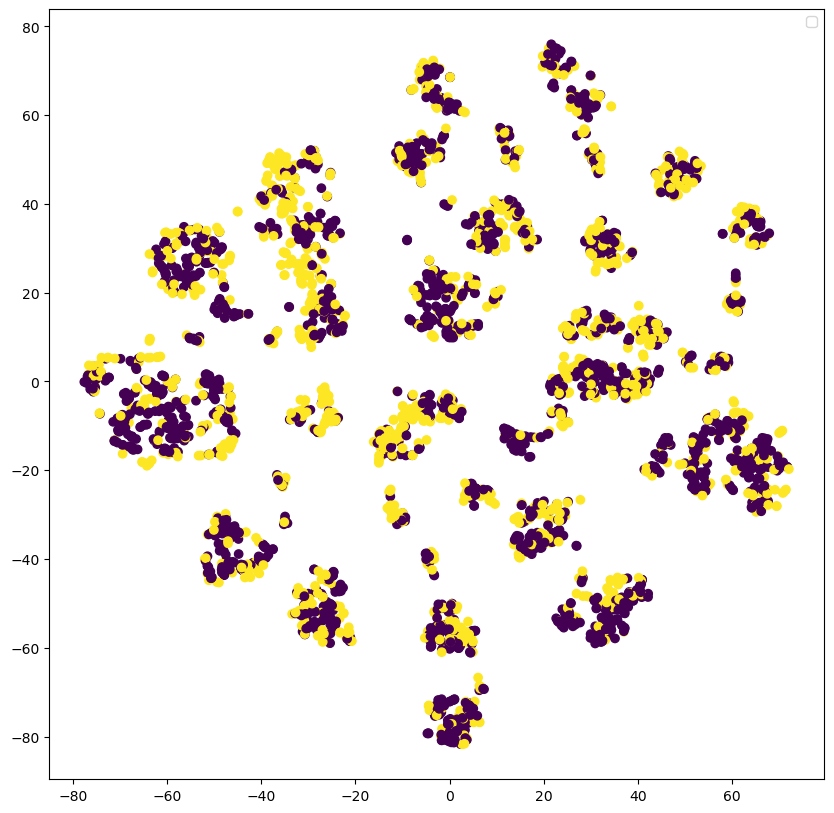

In [23]:
from sklearn.manifold import TSNE
tsne =TSNE(n_components=2,perplexity=20,random_state=42)
tsne_df = tsne.fit_transform(X)
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_df[:,0],tsne_df[:,1],c=y)
plt.legend()
plt.show()

In [24]:
school_df.to_csv('updated_data.csv')